# Sentiment Analysis through Unsupervised Learning

This notebook exploits the AFINN lexicon to calculate the sentiment of every book chapter. As output this script produces a plot (located in the `plot` folder) and a `sentiment.csv` file (located in the `data` directory) containing the positive, negative and neutral indexes for each chapter.

Requirements:
* before running this script, you should run Preprocessing
* make sure that the `config.ini` file is properly configured.

In [1]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
book_folder = config['BOOK']['book_folder']
nchapters = int(config['BOOK']['n_chapters'])

In [2]:
from afinn import Afinn
import os

output_folder = 'plots/' + book_folder
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

Then create a new `Afinn` object, by specifying the used language.

In [3]:
afinn = Afinn(language='en')

The `afinn` object contains a method, called `score()`, which receives a sentence as input and returns a score as output. The score may be either positive, negative or neutral. We calculate the score of a book, simply by summing all the scores of all the sentence of that book. We define three variables> pos, neg and neutral, which store respectively the sum of all the positive, negative and neutral scores of all the sentences of a book.

Firstly, we define three indexes, which will be used after.

In [4]:
pos_index = []
neg_index = []
neutral_index = []

We open the file corresponding to each book through the `open()` function, we read all the lines through the function `file.readlines()` and for each line, we calculate the score.

Then, we can define three indexes to calculate the sentiment of a book: the positive sentiment index (pi), the negative sentiment index (ni) and the neutral sentiment index (nui). The pi of a book corresponds to the number of positive sentences in a book divided per the total number of sentences of the book. Similarly, we can calculate the ni and nui of a book.

In [5]:
source_folder = 'data/' + book_folder + '/'
for book in range(1,nchapters+1):
    file = open(source_folder + str(book) + '_clean.txt')
    lines = file.readlines()
    pos = 0
    neg = 0
    neutral = 0
    
    for line in lines:
        score = int(afinn.score(line))
        
        if score > 0:
            pos += 1
        elif score < 0:
            neg += 1
        else:
            neutral += 1
        
    n = len(lines)
    pos_index.append(pos / n)
    neg_index.append(neg / n)
    neutral_index.append(neutral / n)

Finally, we can plot results, by using the `matplotlib` package.

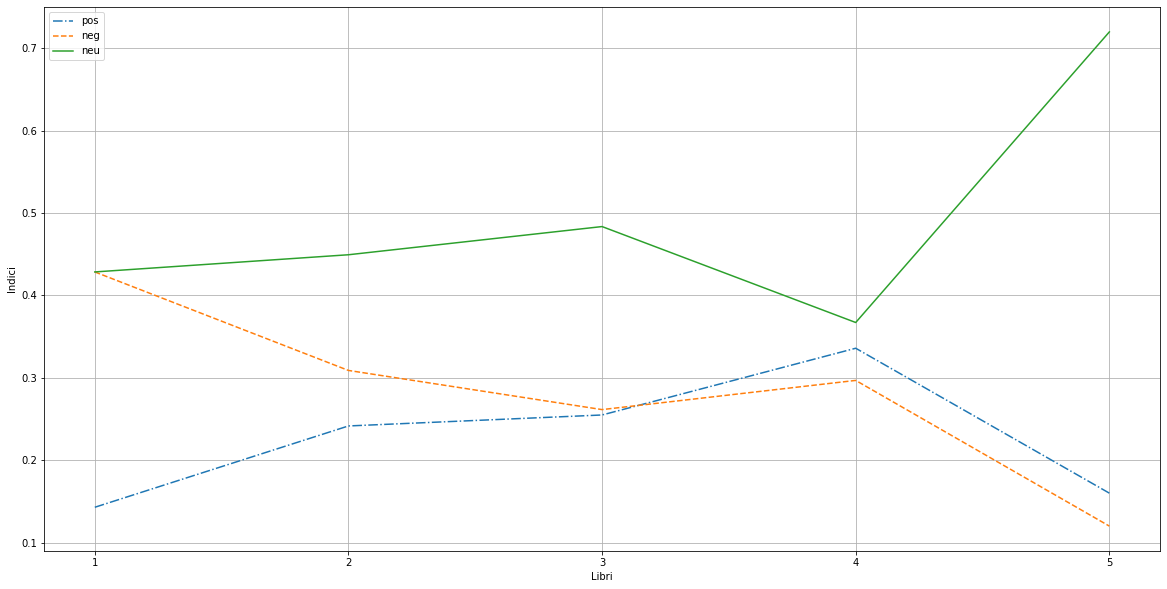

In [6]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1,nchapters+1)
plt.figure(figsize=(20,10))
plt.plot(X,pos_index,'-.',label='pos')
plt.plot(X,neg_index, '--',label='neg')
plt.plot(X,neutral_index,'-',label='neu')
plt.legend()
plt.xticks(X)
plt.xlabel('Libri')
plt.ylabel('Indici')
plt.grid()
plt.savefig('plots/' + book_folder + '/afinn-bsi.png')
plt.show()  

In [7]:
# save indexes on a CSV file
import pandas as pd
output_list = []
for i in range(0,nchapters):
    output_list.append({'chapter': i+1, 'pos': pos_index[i], 'neg': neg_index[i] , 'neutral': neutral_index[i]})
df  = pd.DataFrame(output_list)
df.to_csv('data/' + book_folder + '/sentiment.csv')